In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.utils.data import DataLoader, Dataset, Subset
import torchvision
from torchvision import transforms

### Task 1: Tensormancy

__1.1 The [_disclaimer_](https://gist.githubusercontent.com/justheuristic/e2c1fa28ca02670cabc42cacf3902796/raw/fd3d935cef63a01b85ed2790b5c11c370245cbd7/stddisclaimer.h)__

Let's write another function, this time in polar coordinates:
$$\rho(\theta) = (1 + 0.9 \cdot cos (6 \cdot \theta) ) \cdot (1 + 0.01 \cdot cos(24 \cdot \theta)) \cdot (0.5 + 0.05 \cdot cos(200 \cdot \theta)) \cdot (10 + sin(10 \cdot \theta))$$


Then convert it into cartesian coordinates ([howto](http://www.mathsisfun.com/polar-cartesian-coordinates.html)) and plot the results.

Use torch tensors only: no lists, loops, numpy arrays, etc.

In [65]:
theta = torch.linspace(-np.pi, np.pi, steps=1000)

In [66]:
rho = (1 + 0.9*torch.cos(6*theta))\
    *(1+0.01*torch.cos(24*theta))\
    *(0.5 + 0.05*torch.cos(200*theta))\
    *(10 + torch.sin(10*theta))

In [67]:
# теперь конвертируем в полярные координаты пары в декартовы координаты и отобразим
x = torch.sin(theta)*rho
y = torch.cos(theta)*rho

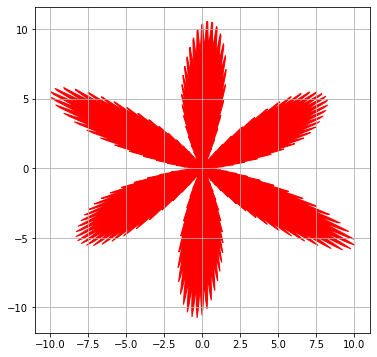

In [68]:
plt.figure(figsize=(6,6))
plt.fill(x.numpy(), y.numpy(), color='red')
plt.grid()

In [69]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s20/week0_09_Optimization_and_Regularization_in_DL/notmnist.py -nc

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [70]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist()

Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


In [71]:
torch.from_numpy(X_train)

tensor([[[[-0.9275, -0.9275, -0.9275,  ..., -0.9275, -0.9275, -0.9275],
          [-0.9275, -0.9275, -0.9275,  ..., -0.9189, -0.9275, -0.9275],
          [-0.9275, -0.9275, -0.9104,  ..., -0.9018, -0.9275, -0.9275],
          ...,
          [-0.9275, -0.9275, -0.9018,  ...,  1.2444,  1.2530,  0.4492],
          [-0.9275, -0.9275, -0.9275,  ...,  1.2530,  1.2530,  0.5090],
          [-0.9275, -0.9275, -0.9275,  ...,  0.4321,  0.4663, -0.0639]]],


        [[[-0.9275, -0.9275, -0.9275,  ...,  0.6544,  0.7827, -0.0981],
          [-0.9275, -0.9275, -0.9275,  ..., -0.9275, -0.9275, -0.9275],
          [-0.9275, -0.9275, -0.9275,  ...,  0.2867,  0.3808, -0.2947],
          ...,
          [-0.9275, -0.4999,  0.5176,  ...,  0.5689, -0.1750, -0.9275],
          [-0.9275, -0.9275, -0.9275,  ..., -0.9275, -0.9275, -0.9275],
          [-0.9275, -0.9018, -0.9275,  ..., -0.9275, -0.9018, -0.9275]]],


        [[[ 0.9964,  1.2530,  1.2530,  ...,  1.2530,  1.2530,  0.9964],
          [-0.5427, -0.354

In [72]:
class DatasetMNIST(Dataset):
    def __init__(self, path='./notMNIST_small', letters='ABCDEFGHIJ', transform=None):
        self.data, self.labels, _ ,_  = load_notmnist(path=path, letters=letters, test_size=0)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        #  загрузить изображение как тип ndarray (высота * ширина * каналы)
         # будьте осторожны при преобразовании dtype в np.uint8 [целое без знака (от 0 до 255)]
         # в этом примере я не использую метод ToTensor() из torchvision.transforms
         # так что вы можете преобразовать форму numpy ndarray в тензор в PyTorch (H, W, C) -->(C, H, W)
        image = self.data[index].transpose(1, 2, 0)
        label = self.labels[index]

        if self.transform is not None:
            image = self.transform(image)

        return image, label
    

In [73]:
full_dataset = DatasetMNIST('./notMNIST_small', 'AB', transform=None)

Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done


In [74]:
# we can access and get data with index by __getitem__(index)
img, lab = full_dataset.__getitem__(0)

print(img.shape)
print(type(img))

(28, 28, 1)
<class 'numpy.ndarray'>


In [75]:
a = torchvision.transforms.ToTensor()

In [76]:
a(img).shape

torch.Size([1, 28, 28])

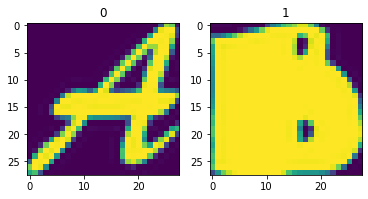

In [77]:
inds = np.random.randint(len(full_dataset), size=2)

for i in range(2):
    plt.subplot(1,2, i+1)
    plt.imshow(full_dataset[inds[i]][0].reshape([28, 28]))
    plt.title(str(full_dataset[inds[i]][1]))

To the Dataloader

In [78]:
train_dataloader = DataLoader(full_dataset, batch_size=8, shuffle=True)

In [79]:
#We can use dataloader as iterator by using iter() function

In [80]:
train_iter = iter(train_dataloader)
print(type(train_iter))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>


In [81]:
images, labels = train_iter.next()

print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))

images shape on batch size = torch.Size([8, 28, 28, 1])
labels shape on batch size = torch.Size([8])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


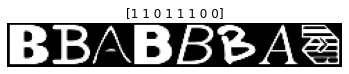

In [82]:
# make grid takes tensor as arg
# tensor : (batchsize, channels, height, width)
grid = torchvision.utils.make_grid(images.permute([0, 3, 1, 2]))

plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.title(labels.numpy());

In [83]:
train_dataset_with_transform = DatasetMNIST(
    transform=torchvision.transforms.ToTensor()
)

Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


In [84]:
img, lab = train_dataset_with_transform.__getitem__(0)
print('image shape at the first row : {}'.format(img.size()))

image shape at the first row : torch.Size([1, 28, 28])


In [85]:
train_loader_tr = DataLoader(train_dataset_with_transform, batch_size=8, shuffle=True)

train_iter_tr = iter(train_loader_tr)

print(train_iter_tr)



In [86]:
images, labels = train_iter_tr.next()

In [87]:
print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))

images shape on batch size = torch.Size([8, 1, 28, 28])
labels shape on batch size = torch.Size([8])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '[9 9 4 2 9 3 8 2]')

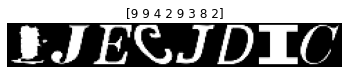

In [88]:
grid = torchvision.utils.make_grid(images)

plt.imshow(grid.numpy().transpose((1,2,0)))
plt.axis('off')
plt.title(labels.numpy())

### Composing several transformations

If you want to take data augmentation, you have to make List using `torchvision.transforms.Compose`

```
class Compose(object):
    """Composes several transforms together.
    Args:
        transforms (list of ``Transform`` objects): list of transforms to compose.
    Example:
        >>> transforms.Compose([
        >>>     transforms.CenterCrop(10),
        >>>     transforms.ToTensor(),
        >>> ])
    """

    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img):
        for t in self.transforms:
            img = t(img)
        return img

    def __repr__(self):
        format_string = self.__class__.__name__ + '('
        for t in self.transforms:
            format_string += '\n'
            format_string += '    {0}'.format(t)
        format_string += '\n)'
        return format_string
```


this function can convert some image by order within `__call__` method.

In [89]:
class Flatten():
    def __call__(self, pic):
        return pic.flatten()
    
    def __repr__(self):
        return self.__class__.__name__+'()'
    

In [90]:
a = Flatten()

In [91]:
a(img).shape

torch.Size([784])

In [92]:
new_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    Flatten()
])

In [93]:
import time
from IPython.display import clear_output

In [94]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cpu')

In [95]:
def subset_ind(dataset, ratio: float):
    return np.random.choice(len(dataset), size=int(ratio*len(dataset)), replace=False)

In [96]:
dataset = DatasetMNIST(
    './notMNIST_small',
    transform=new_transform
)

shrink_inds = subset_ind(dataset, 0.2 )
dataset = Subset(dataset, shrink_inds)
print(f'\n\n dataset size: {len(dataset)}, labels: {np.unique(dataset.dataset.labels)}')

Parsing...
found broken img: ./notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done


 dataset size: 3744, labels: [0 1 2 3 4 5 6 7 8 9]


In [97]:
#размер первого объекта вектор размером 784 (28*28)
dataset[0][0].shape

torch.Size([784])

In [98]:
val_size = 0.2
val_inds = subset_ind(dataset, val_size)

train_dataset = Subset(dataset, [i for i in range(len(dataset)) if i not in val_inds])
val_dataset = Subset(dataset, val_inds)

print(f' training size: {len(train_dataset)}\nvalidation size: {len(val_dataset)}')

 training size: 2996
validation size: 748


In [99]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [100]:
train_iter = iter(train_loader)
print(type(train_iter))

images, labels =train_iter.next()

print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
images shape on batch size = torch.Size([32, 784])
labels shape on batch size = torch.Size([32])


In [101]:
from torch import nn
from torch.nn import functional as F

model = nn.Sequential(
    nn.Linear(784, 10),
    
)
model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [102]:
from torchsummary import summary

In [103]:
summary(model, (784,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


In [107]:
def train_model(model, train_loader, val_loader, loss_fn, opt, n_epochs: int):
    '''
    model: нейросеть для обучения,
    train_loader, val_loader: загрузчики данных
    loss_fn: целевая метрика (которую будем оптимизировать)
    opt: оптимизатор (обноваляет веса нейросети)
    n_epochs: количество эпох полных проходов датасета
    '''
    train_loss = []
    val_loss = []
    val_accuracy = []
    
    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = {}
        start_time = time.time()
        
        model.train(True) # enable dropout /batch_norm training behavior
        for X_batch, y_batch in train_loader:
            # move data to target device
            opt.zero_grad()
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            predictions = model(X_batch)
            loss = loss_fn(predictions, y_batch)
            loss.backward()
            opt.step()
            
            
            # train on batch: compute loss, calc grads, perform optimizer step and zero the grads
            
            ep_train_loss.append(loss.item())
        
        model.train(False) # disable dropout /use averages for batch_norm
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                # move data to target device
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                
                predictions = model(X_batch)
                loss = loss_fn(predictions, y_batch)
                
                #compute predictions
                ep_val_loss.append(loss.item())
                y_pred = preds.max(1)[1].data
                ep_val_accuracy.append(np.mean((y_batch.cpu() == y_pred.cpu()).numpy() ))
         # print the results for this epoch:
        print(f'Epoch {epoch + 1} of {n_epochs} took {time.time() - start_time:.3f}s')

        train_loss.append(np.mean(ep_train_loss))
        val_loss.append(np.mean(ep_val_loss))
        val_accuracy.append(np.mean(ep_val_accuracy))
        
        print(f"\t  training loss: {train_loss[-1]:.6f}")
        print(f"\tvalidation loss: {val_loss[-1]:.6f}")
        print(f"\tvalidation accuracy: {val_accuracy[-1]:.3f}")

    return train_loss, val_loss, val_accuracy
            
                
            
        

In [108]:
def train_model1(model, train_loader, val_loader, loss_fn, opt, n_epochs: int):
    train_loss = []
    val_loss = []
    val_accuracy = []
    
    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = []
        start_time = time.time()

        model.train(True) # enable dropout / batch_norm training behavior
        for X_batch, y_batch in train_loader:
            # move data to target device
            ### YOUR CODE HERE
            opt.zero_grad()
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            predictions = model(X_batch)
            loss = loss_fn(predictions, y_batch)
            loss.backward()
            opt.step()
            

            # train on batch: compute loss, calc grads, perform optimizer step and zero the grads
            ### YOUR CODE HERE
            ep_train_loss.append(loss.item())

        model.train(False) # disable dropout / use averages for batch_norm
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)
                
                predictions = model(X_batch)
                loss = loss_fn(predictions, y_batch)
                
                #compute predictions
                ep_val_loss.append(loss.item())
                y_pred = preds.max(1)[1].data
                ep_val_accuracy.append(np.mean((y_batch.cpu() == y_pred.cpu()).numpy() ))

        # print the results for this epoch:
        print(f'Epoch {epoch + 1} of {n_epochs} took {time.time() - start_time:.3f}s')

        train_loss.append(np.mean(ep_train_loss))
        val_loss.append(np.mean(ep_val_loss))
        val_accuracy.append(np.mean(ep_val_accuracy))
        
        print(f"\t  training loss: {train_loss[-1]:.6f}")
        print(f"\tvalidation loss: {val_loss[-1]:.6f}")
        print(f"\tvalidation accuracy: {val_accuracy[-1]:.3f}")

    return train_loss, val_loss, val_accuracy

In [109]:
n_epochs = 30
Yt_train = Yt_train.type(torch.LongTensor)
loss_func = nn.CrossEntropyLoss()
train_loss, val_loss, val_accuracy = train_model(model, train_loader, val_loader, loss_func, opt, n_epochs)

RuntimeError: expected scalar type Long but found Int

### Real network

In [113]:
model = nn.Sequential(
        nn.Linear(784, 500),
        nn.ReLU(),
        nn.Linear(500, 200),
        nn.ReLU(),
        nn.Linear(200,10),
)

model.to(device, torch.float32)

opt = torch.optim.Adam(model.parameters(), lr=1e-3)


In [114]:
summary(model, (784,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 500]         392,500
              ReLU-2                  [-1, 500]               0
            Linear-3                  [-1, 200]         100,200
              ReLU-4                  [-1, 200]               0
            Linear-5                   [-1, 10]           2,010
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.89
Estimated Total Size (MB): 1.90
----------------------------------------------------------------


In [116]:
n_epochs = 30
train_loss, val_loss, val_accuracy = train_model1(model, train_loader, val_loader, loss_func, opt, n_epochs)

RuntimeError: expected scalar type Long but found Int